In [17]:
import pandas as pd
import numpy as np
data = pd.read_csv('JOBS Data-Analysics.csv')
data.shape

(2253, 16)

In [2]:
data.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True
1,1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1
2,2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1
3,3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
4,4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True


In [3]:
data.isnull().sum()

Unnamed: 0           0
Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         1
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
Easy Apply           0
dtype: int64

In [35]:
#data cleaning
data = data.drop(columns= ['Unnamed: 0'])

In [36]:
data.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice,"New York, NY","New York, NY",201 to 500 employees,1961.0,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),NaN,True
1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York,"New York, NY","New York, NY",10000+ employees,1893.0,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),NaN,NaN
2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace,"New York, NY","New York, NY",1001 to 5000 employees,2003.0,Company - Private,Internet,Information Technology,NaN,GoDaddy,NaN
3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity,"New York, NY","McLean, VA",201 to 500 employees,2002.0,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),NaN,NaN
4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel,"New York, NY","New York, NY",501 to 1000 employees,2009.0,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True


In [58]:
#clean salaries column by making it mmin, max and avg
# Extract "min K" and "max K" as numbers (like 37 and 66)
min_k = data['Salary Estimate'].str.extract(r'\$(\d+)K', expand=False)
max_k = data['Salary Estimate'].str.extract(r'-\$(\d+)K', expand=False)

# Convert to numeric dollars
data['min_salary'] = pd.to_numeric(min_k, errors='coerce') * 1000
data['max_salary'] = pd.to_numeric(max_k, errors='coerce') * 1000
data['avg_salary'] = (data['min_salary'] + data['max_salary']) / 2

# quick check
data[['Salary Estimate','min_salary','max_salary','avg_salary']].head(10)


,Salary Estimate,min_salary,max_salary,avg_salary
0,$37K-$66K,37000.0,66000.0,51500.0
1,$37K-$66K,37000.0,66000.0,51500.0
2,$37K-$66K,37000.0,66000.0,51500.0
3,$37K-$66K,37000.0,66000.0,51500.0
4,$37K-$66K,37000.0,66000.0,51500.0
5,$37K-$66K,37000.0,66000.0,51500.0
6,$37K-$66K,37000.0,66000.0,51500.0
7,$37K-$66K,37000.0,66000.0,51500.0
8,$37K-$66K,37000.0,66000.0,51500.0
9,$37K-$66K,37000.0,66000.0,51500.0


In [38]:
#cleaning company names
# start with a safe copy of original company name
data['Company Name'] = data['Company Name'].astype(str)

# remove anything after a newline (if present)
data['Company Name'] = data['Company Name'].str.replace(r'\n.*', '', regex=True)

# remove a trailing number like " 3.5"
data['Company Name'] = data['Company Name'].str.replace(r'\s*\d+(\.\d+)?$', '', regex=True)

data['Company Name'].head(10)


0             Vera Institute of Justice
1    Visiting Nurse Service of New York
2                           Squarespace
3                              Celerity
4                               FanDuel
5                                 Point
6                             Two Sigma
7               GNY Insurance Companies
8                                  DMGT
9                             Riskified
Name: Company Name, dtype: object

In [39]:
data.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,min_salary,max_salary,avg_salary
0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice,"New York, NY","New York, NY",201 to 500 employees,1961.0,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),NaN,True,37000.0,NaN,NaN
1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York,"New York, NY","New York, NY",10000+ employees,1893.0,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),NaN,NaN,37000.0,NaN,NaN
2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace,"New York, NY","New York, NY",1001 to 5000 employees,2003.0,Company - Private,Internet,Information Technology,NaN,GoDaddy,NaN,37000.0,NaN,NaN
3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity,"New York, NY","McLean, VA",201 to 500 employees,2002.0,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),NaN,NaN,37000.0,NaN,NaN
4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel,"New York, NY","New York, NY",501 to 1000 employees,2009.0,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True,37000.0,NaN,NaN


In [40]:
#split city and state
# make sure Location is string
data['Location'] = data['Location'].astype(str)

# split once on the first comma
city_state = data['Location'].str.split(',', n=1, expand=True)

data['City'] = city_state[0].str.strip()
data['State'] = city_state[1].str.strip() if city_state.shape[1] > 1 else np.nan

data[['Location','City','State']].head(10)


,Location,City,State
0,"New York, NY",New York,NY
1,"New York, NY",New York,NY
2,"New York, NY",New York,NY
3,"New York, NY",New York,NY
4,"New York, NY",New York,NY
5,"New York, NY",New York,NY
6,"New York, NY",New York,NY
7,"New York, NY",New York,NY
8,"New York, NY",New York,NY
9,"New York, NY",New York,NY


In [41]:
data.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,min_salary,max_salary,avg_salary,City,State
0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice,"New York, NY","New York, NY",201 to 500 employees,1961.0,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),NaN,True,37000.0,NaN,NaN,New York,NY
1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York,"New York, NY","New York, NY",10000+ employees,1893.0,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),NaN,NaN,37000.0,NaN,NaN,New York,NY
2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace,"New York, NY","New York, NY",1001 to 5000 employees,2003.0,Company - Private,Internet,Information Technology,NaN,GoDaddy,NaN,37000.0,NaN,NaN,New York,NY
3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity,"New York, NY","McLean, VA",201 to 500 employees,2002.0,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),NaN,NaN,37000.0,NaN,NaN,New York,NY
4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel,"New York, NY","New York, NY",501 to 1000 employees,2009.0,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True,37000.0,NaN,NaN,New York,NY


In [42]:
data['Founded'] = pd.to_numeric(data['Founded'], errors='coerce')
data.loc[data['Founded'] <= 0, 'Founded'] = np.nan
data['Founded'].describe()


count    1593.000000
mean     1978.362837
std        47.822289
min      1682.000000
25%      1970.000000
50%      1997.000000
75%      2006.000000
max      2019.000000
Name: Founded, dtype: float64

In [68]:
cols_with_minus1 = ['Competitors','Industry', 'Headquarters', 'Easy Apply']
for c in cols_with_minus1:
    if c in data.columns:
        data[c] = data[c].replace('-1', np.nan)

# also standardize "Unknown / Non-Applicable" text to NaN in some business columns
for c in ['Revenue', 'Industry', 'Sector', 'Type of ownership', 'Size']:
    if c in data.columns:
        data[c] = data[c].replace(['Unknown / Non-Applicable', 'Unknown'], np.nan)

data[cols_with_minus1].head()


,Competitors,Industry,Headquarters,Easy Apply
0,NaN,Social Assistance,"New York, NY",True
1,NaN,Health Care Services & Hospitals,"New York, NY",NaN
2,GoDaddy,Internet,"New York, NY",NaN
3,NaN,IT Services,"McLean, VA",NaN
4,DraftKings,Sports & Recreation,"New York, NY",True


In [44]:
if 'Easy Apply' in data.columns:
    data['Easy Apply'] = data['Easy Apply'].map(
        {'True': True, 'False': False, True: True, False: False}
    )
data['Easy Apply'].value_counts(dropna=False)


Easy Apply
NaN     2173
True      80
Name: count, dtype: int64

In [45]:
data.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,min_salary,max_salary,avg_salary,City,State
0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice,"New York, NY","New York, NY",201 to 500 employees,1961.0,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),NaN,True,37000.0,NaN,NaN,New York,NY
1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York,"New York, NY","New York, NY",10000+ employees,1893.0,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),NaN,NaN,37000.0,NaN,NaN,New York,NY
2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace,"New York, NY","New York, NY",1001 to 5000 employees,2003.0,Company - Private,Internet,Information Technology,NaN,GoDaddy,NaN,37000.0,NaN,NaN,New York,NY
3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity,"New York, NY","McLean, VA",201 to 500 employees,2002.0,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),NaN,NaN,37000.0,NaN,NaN,New York,NY
4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel,"New York, NY","New York, NY",501 to 1000 employees,2009.0,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True,37000.0,NaN,NaN,New York,NY


In [47]:
before = data.shape[0]
data = data.drop_duplicates()
after = data.shape[0]
print(f"Removed {before - after} duplicate rows")
data.isna().sum().sort_values(ascending=False)



Removed 0 duplicate rows


avg_salary           2253
max_salary           2253
Easy Apply           2173
Competitors          1732
Founded               660
Revenue               615
Headquarters          172
Size                   42
Type of ownership      16
min_salary              1
Job Title               0
City                    0
Industry                0
Sector                  0
Salary Estimate         0
Location                0
Company Name            0
Rating                  0
Job Description         0
State                   0
dtype: int64

In [62]:
data.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,min_salary,max_salary,avg_salary,City,State
0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K,Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice,"New York, NY","New York, NY",201 to 500 employees,1961.0,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),NaN,True,37000.0,66000.0,51500.0,New York,NY
1,Quality Data Analyst,$37K-$66K,Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York,"New York, NY","New York, NY",10000+ employees,1893.0,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),NaN,NaN,37000.0,66000.0,51500.0,New York,NY
2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K,We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace,"New York, NY","New York, NY",1001 to 5000 employees,2003.0,Company - Private,Internet,Information Technology,NaN,GoDaddy,NaN,37000.0,66000.0,51500.0,New York,NY
3,Data Analyst,$37K-$66K,Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity,"New York, NY","McLean, VA",201 to 500 employees,2002.0,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),NaN,NaN,37000.0,66000.0,51500.0,New York,NY
4,Reporting Data Analyst,$37K-$66K,ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel,"New York, NY","New York, NY",501 to 1000 employees,2009.0,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True,37000.0,66000.0,51500.0,New York,NY


In [26]:
df_clean_path = "jobs_clean.csv"
data.to_csv(df_clean_path, index=False)
df_clean_path


'jobs_clean.csv'

In [33]:
#EDA
import matplotlib.pyplot as plt
import seaborn as sns

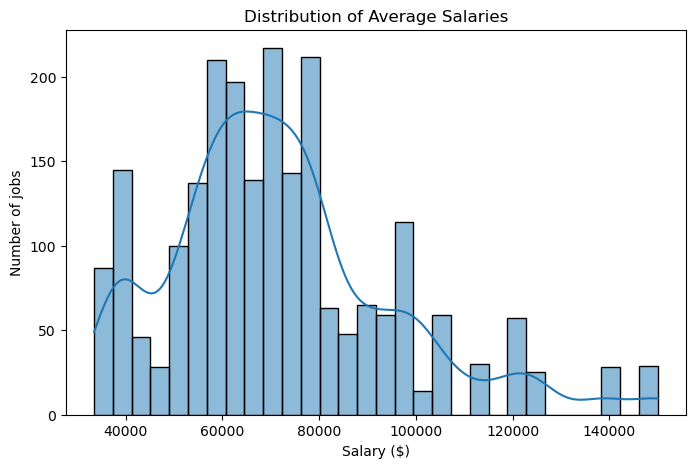

In [59]:
plt.figure(figsize= (8,5))
sns.histplot(data['avg_salary'], bins = 30, kde= True)
plt.title('Distribution of Average Salaries')
plt.xlabel('Salary ($)')
plt.ylabel('Number of jobs')
plt.show()

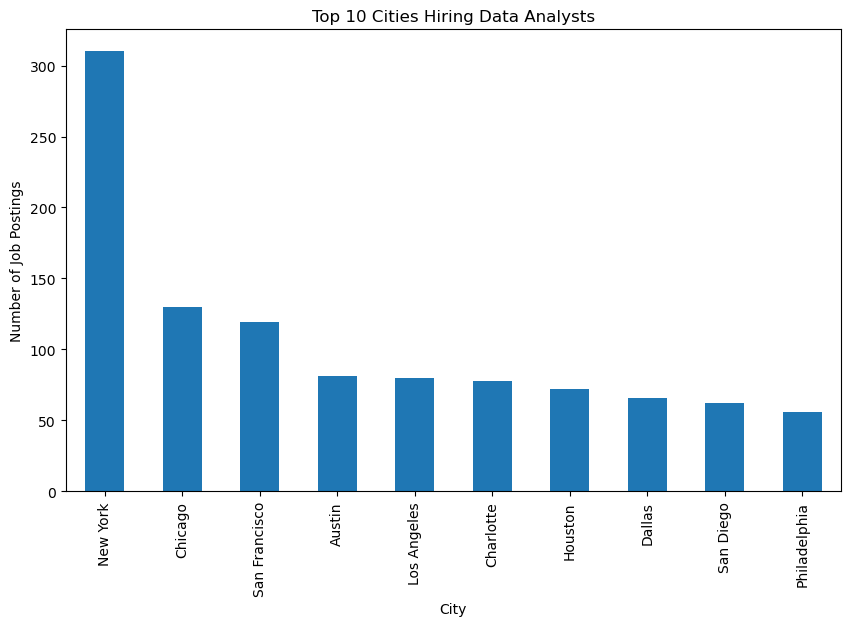

In [60]:
plt.figure(figsize=(10,6))
data['City'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Cities Hiring Data Analysts")
plt.xlabel("City")
plt.ylabel("Number of Job Postings")
plt.show()


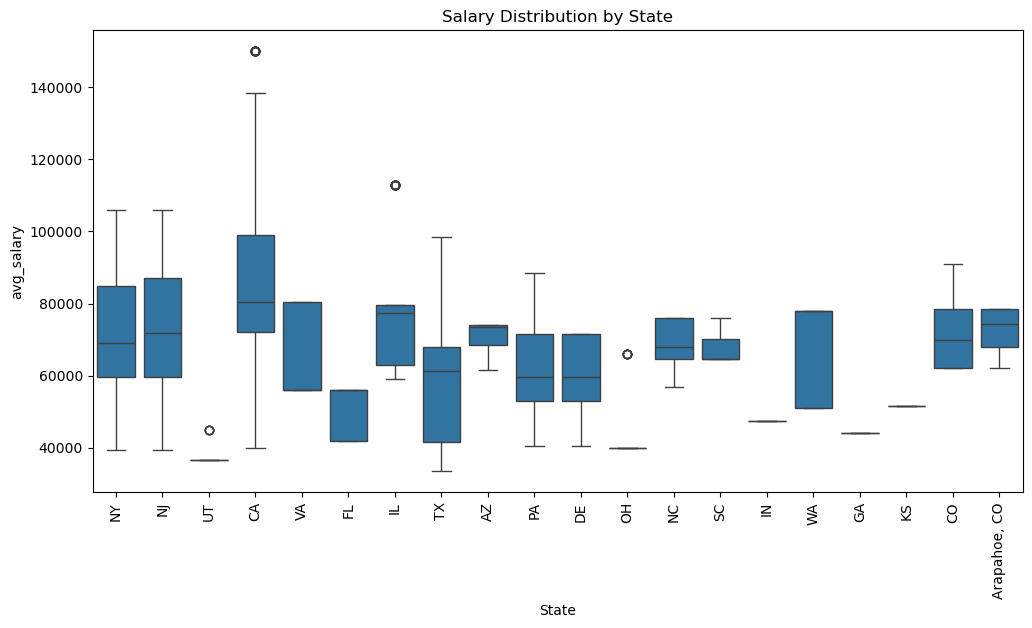

In [64]:
plt.figure(figsize=(12,6))
sns.boxplot(x='State', y='avg_salary', data=data)
plt.xticks(rotation=90)
plt.title("Salary Distribution by State")
plt.show()


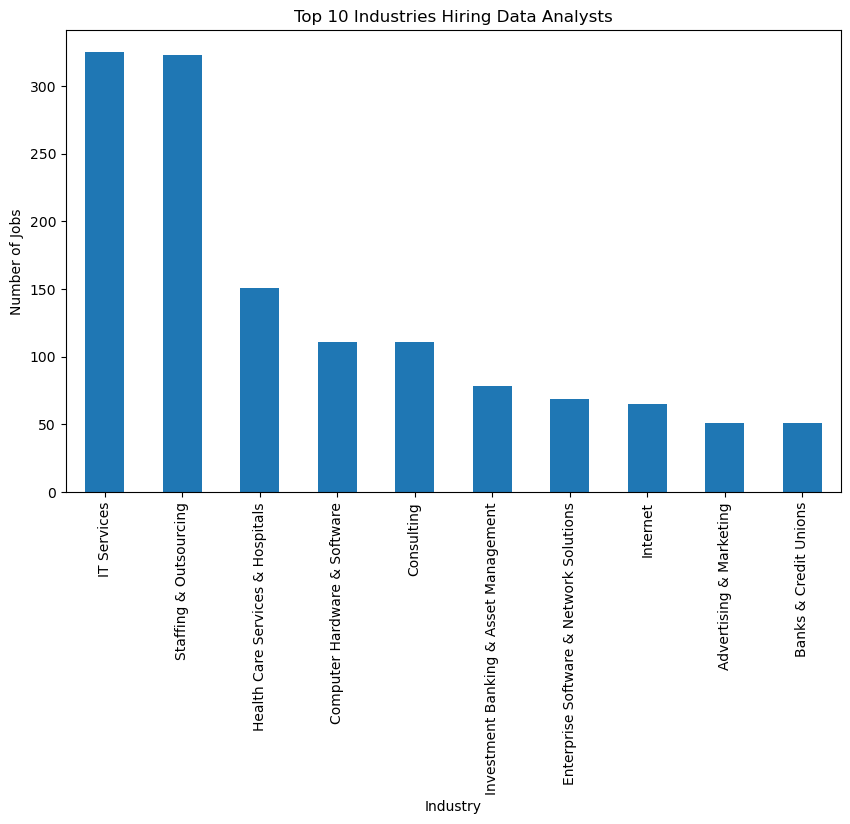

In [70]:
plt.figure(figsize=(10,6))
data['Industry'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Industries Hiring Data Analysts")
plt.xlabel("Industry")
plt.ylabel("Number of Jobs")
plt.show()


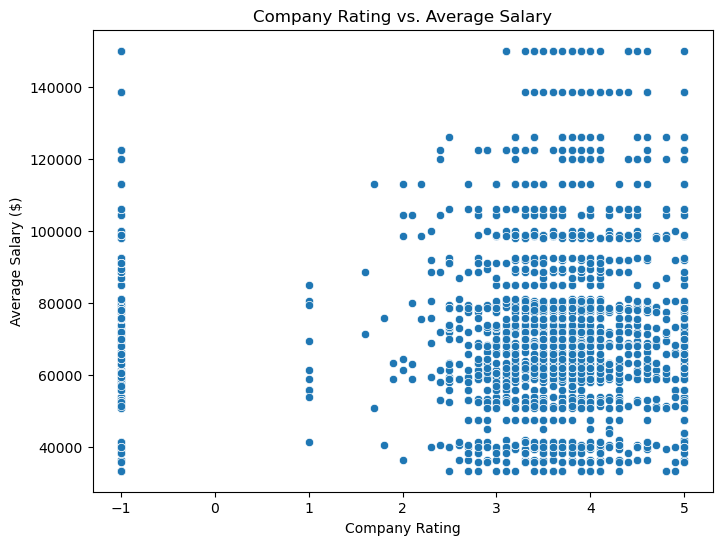

In [71]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Rating', y='avg_salary', data=data)
plt.title("Company Rating vs. Average Salary")
plt.xlabel("Company Rating")
plt.ylabel("Average Salary ($)")
plt.show()


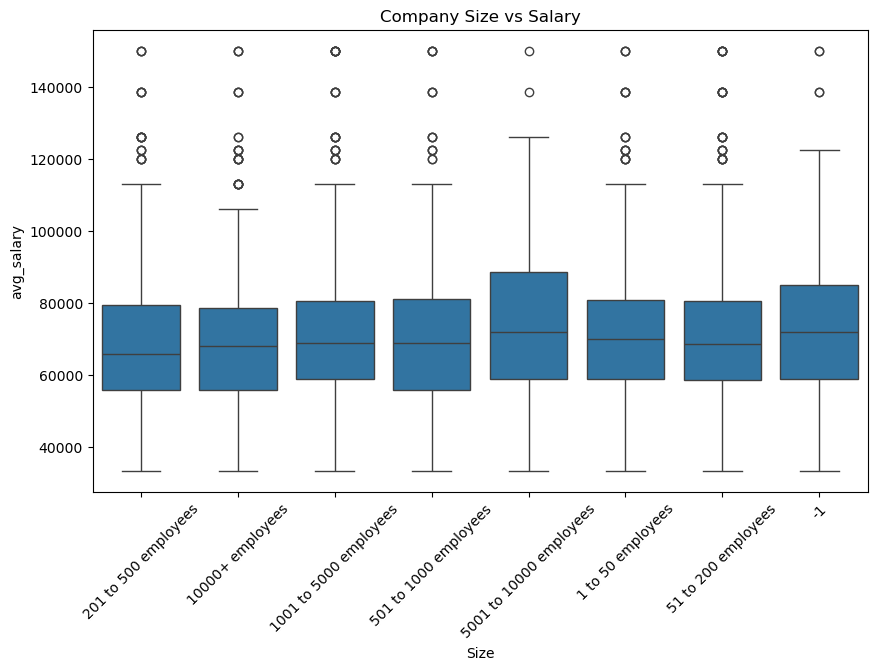

In [72]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Size', y='avg_salary', data=data)
plt.xticks(rotation=45)
plt.title("Company Size vs Salary")
plt.show()


In [73]:
from collections import Counter
import re

In [74]:
# make everything lowercase and remove missing values
text_data = " ".join(data['Job Description'].dropna().str.lower())


In [75]:
skills = ["python", "sql", "excel", "tableau", "power bi", "r", "sas", 
          "hadoop", "spark", "aws", "azure", "java", "c++", "machine learning", 
          "statistics", "data visualization"]

# count how many times each appears
skill_counts = {}
for skill in skills:
    skill_counts[skill] = len(re.findall(skill, text_data))


In [76]:
skill_df = pd.DataFrame(list(skill_counts.items()), columns=['Skill', 'Count'])
skill_df = skill_df.sort_values(by='Count', ascending=False)
skill_df


,Skill,Count
5,r,377179
12,c++,223910
1,sql,2691
2,excel,2396
3,tableau,845
0,python,828
14,statistics,769
6,sas,605
15,data visualization,460
9,aws,389


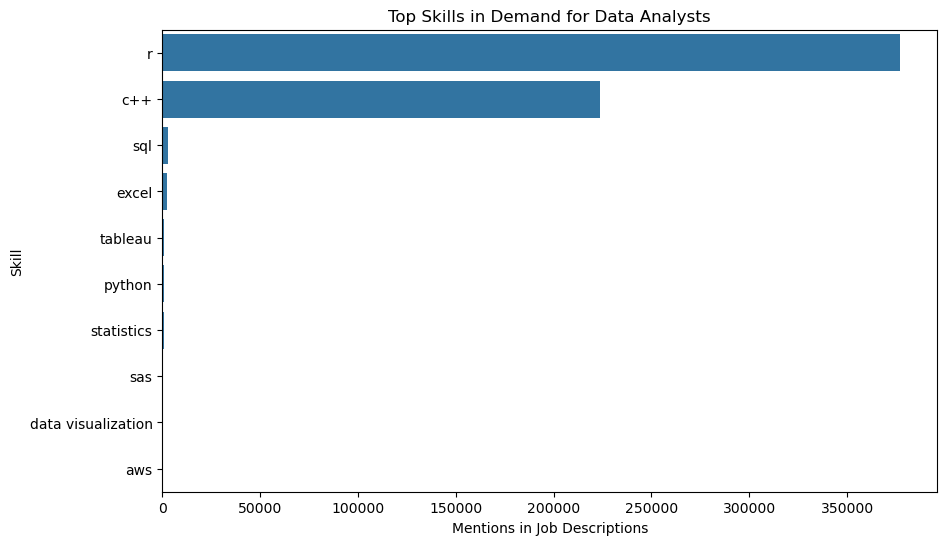

In [77]:
plt.figure(figsize=(10,6))
sns.barplot(x='Count', y='Skill', data=skill_df.head(10))
plt.title("Top Skills in Demand for Data Analysts")
plt.xlabel("Mentions in Job Descriptions")
plt.ylabel("Skill")
plt.show()


C:\Users\13309\AppData\Local\Temp\ipykernel_2032\2040199294.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Job Title', data=data, order=data['Job Title'].value_counts().iloc[:10].index, palette='viridis')


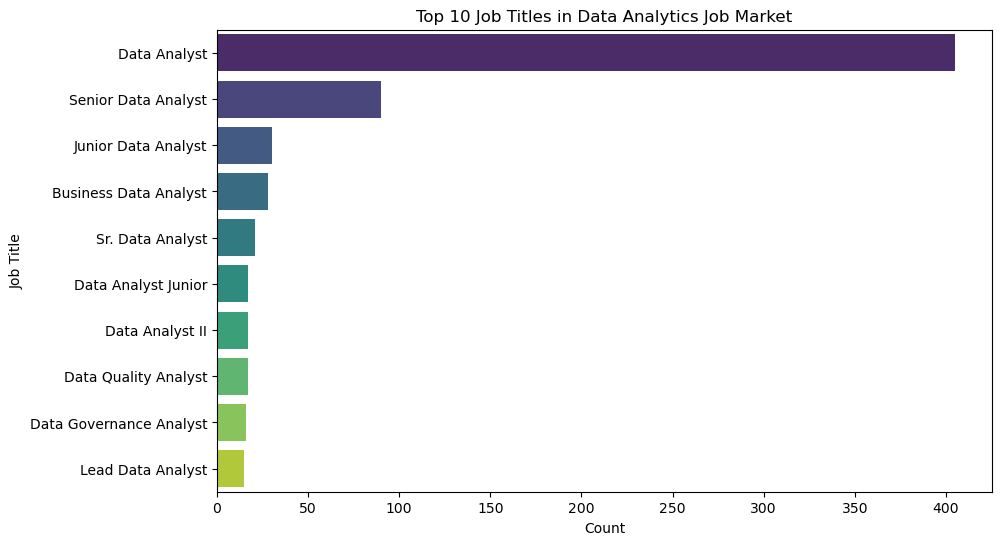

In [81]:
# Plot top 10 most common job titles
plt.figure(figsize=(10,6))
sns.countplot(y='Job Title', data=data, order=data['Job Title'].value_counts().iloc[:10].index, palette='viridis')
plt.title("Top 10 Job Titles in Data Analytics Job Market")
plt.xlabel("Count")
plt.ylabel("Job Title")
plt.show()